_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll predict whether each shot was made, using information about the shot and the game. This is hard to predict! Try to get above 60% accuracy. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [1]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

     |████████████████████████████████| 92kB 5.7MB/s 
     |████████████████████████████████| 133kB 4.7MB/s 
     |████████████████████████████████| 614kB 40.7MB/s 
     |████████████████████████████████| 225kB 41.2MB/s 
     |████████████████████████████████| 768kB 54kB/s 
     |████████████████████████████████| 194kB 49.8MB/s 
     |████████████████████████████████| 51kB 19.9MB/s 
     |████████████████████████████████| 737kB 35.6MB/s 
     |████████████████████████████████| 51kB 20.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=f6483b943da9b4407e8bde81b74e827486f4f91957c564f63e04b4edbdfc2cb4
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=72a8e9ed4c107e17c251d25d9cc4e5d8e90e2ee212515bc086f8e4becf73a366
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d6

In [0]:
import pandas as pd
# Read data
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (13958, 20)

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

**1. Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is your baseline accuracy, if you guessed the majority class for every prediction?

**2. Hold out your test set.** Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

**3. Engineer new feature.** Engineer at least **1** new feature, from this list, or your own idea.
- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**4. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**5.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**6.** Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.) 

**7.** Get your model's **test accuracy.** (One time, at the end.)


**8.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

### Stretch Goals
- Engineer 4+ new features total, either from the list above, or your own ideas.
- Make 2+ visualizations to explore relationships between features and target.
- Optimize 3+ hyperparameters by trying 10+ "candidates" (possible combinations of hyperparameters). You can use `RandomizedSearchCV` or do it manually.
- Get and plot your model's feature importances.



In [218]:
print(df.shape)
df.head()

(13958, 20)


,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0


## 1. Begin with baselines for classification. 

>Your target to predict is `shot_made_flag`. What would your baseline accuracy be, if you guessed the majority class for every prediction?

In [219]:
df.shot_made_flag.describe()

count    13958.000000
mean         0.472919
std          0.499284
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: shot_made_flag, dtype: float64

In [220]:
df.shot_made_flag.value_counts(normalize=True) #target is binary. This is consider as a categorical column.



0    0.527081
1    0.472919
Name: shot_made_flag, dtype: float64

In [221]:
y_train=df['shot_made_flag']

majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
print(len(y_pred))

13958


In [222]:
# Accuracy of majority class baseline = frequency of majority class
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5270812437311936

## 2. Hold out your test set.

>Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

In [0]:
#test = 2018-19 season(begin in October and end in June)
# column game_date
#Convert to date format
 df['game_date'] = pd.to_datetime(df['game_date'], infer_datetime_format=True)

In [224]:
 df['game_date'].dt.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [225]:
#train=df[(df['game_date']>= pd.Timestamp(year=2019, month=1, day=1))&(df2['SALE_DATE']< pd.Timestamp(year=2019, month=4, day=1))] 
test=df[(df['game_date']>= pd.Timestamp(year=2018, month=10, day=1))& (df['game_date']< pd.Timestamp(year=2019, month=7, day=1))] 
test.shape

(1709, 20)

In [226]:
train= df[(df['game_date']< pd.Timestamp(year=2018, month=10, day=1))]
train.shape

(12249, 20)

In [227]:
df.shape

(13958, 20)

In [228]:

1709+12249 # correct!

13958

## 3. Engineer new feature.

>Engineer at least **1** new feature, from this list, or your own idea.
>
>- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
>- **Opponent**: Who is the other team playing the Golden State Warriors?
>- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
>- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
>- **Made previous shot**: Was Steph Curry's previous shot successful?

    

In [0]:
# import pandas_profiling
# pandas_profiling.ProfileReport(train)

In [230]:
list(train.columns)


['game_id',
 'game_event_id',
 'player_name',
 'period',
 'minutes_remaining',
 'seconds_remaining',
 'action_type',
 'shot_type',
 'shot_zone_basic',
 'shot_zone_area',
 'shot_zone_range',
 'shot_distance',
 'loc_x',
 'loc_y',
 'shot_made_flag',
 'game_date',
 'htm',
 'vtm',
 'season_type',
 'scoremargin_before_shot']

In [0]:
# Homecourt Advantage: Is the home team (htm) the Golden State Warriors (GSW) ?
# Opponent: Who is the other team playing the Golden State Warriors?
# Seconds remaining in the period: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
# Seconds remaining in the game: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
# Made previous shot: Was Steph Curry's previous shot successful?

In [232]:
train.htm.unique()

array(['GSW', 'PHX', 'SAC', 'IND', 'MIL', 'CLE', 'BOS', 'DAL', 'SAS',
       'DEN', 'OKC', 'NJN', 'CHI', 'DET', 'PHI', 'MEM', 'NOH', 'LAL',
       'POR', 'MIN', 'HOU', 'MIA', 'ORL', 'ATL', 'CHA', 'LAC', 'UTA',
       'TOR', 'WAS', 'NYK', 'BKN', 'NOP'], dtype=object)

In [233]:
train.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0


In [234]:
train.dtypes

game_id                             int64
game_event_id                       int64
player_name                        object
period                              int64
minutes_remaining                   int64
seconds_remaining                   int64
action_type                        object
shot_type                          object
shot_zone_basic                    object
shot_zone_area                     object
shot_zone_range                    object
shot_distance                       int64
loc_x                               int64
loc_y                               int64
shot_made_flag                      int64
game_date                  datetime64[ns]
htm                                object
vtm                                object
season_type                        object
scoremargin_before_shot           float64
dtype: object

In [0]:
import numpy as np

In [0]:
def wrangle(X):
  X = X.copy()
   
  # Seconds remaining in the period: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
  X['total_remaining_period'] = (X['minutes_remaining']*60)+X['seconds_remaining']

  # Seconds remaining in the game: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
  X['total_remaining_game'] = ((4-(X['period']*12*60))+X['seconds_remaining'])

  # Homecourt Advantage: Is the home team (htm) the Golden State Warriors (GSW) ?

  X['homecourt_advantage'] =['Advantage' if a == 'GSW' else 'Not_Advantage' for a in X['htm']]

  #My feature engineer
  X['year_game'] = X['game_date'].dt.year
  X['month_game'] = X['game_date'].dt.month
  X['day_game'] = X['game_date'].dt.day



  X = X.drop(columns='game_date')
  return X



In [237]:
train = wrangle(train)
test = wrangle(test)
train.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,total_remaining_period,total_remaining_game,homecourt_advantage,year_game,month_game,day_game
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0,685,-691,Advantage,2009,10,28
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0,571,-685,Advantage,2009,10,28
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0,362,-714,Advantage,2009,10,28
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0,589,-1387,Advantage,2009,10,28
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0,139,-1417,Advantage,2009,10,28


## **4. Decide how to validate** your model. 

>Choose one of the following options. Any of these options are good. You are not graded on which you choose.
>
>- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
>- **Train/validate/test split: random 80/20%** train/validate split.
>- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

In [0]:
# Train/validate/test split: random 80/20% train/validate split
from sklearn.model_selection import train_test_split


X_train,X_val,y_train, y_val= train_test_split((train.drop('shot_made_flag',axis=1)),(train.shot_made_flag), train_size=0.80, test_size=0.20,  stratify=train['shot_made_flag'],
                             random_state=42)


In [115]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9799, 23), (2450, 23), (9799,), (2450,))

In [116]:
X_train.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,htm,vtm,season_type,scoremargin_before_shot,total_remaining_period,total_remaining_game,year_game,month_game,day_game
4723,21300515,361,Stephen Curry,3,1,32,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-13,-2,MIL,GSW,Regular Season,17.0,92,-2124,2014,1,7
4213,21300124,9,Stephen Curry,1,10,47,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-180,205,GSW,OKC,Regular Season,-1.0,647,-669,2013,11,14
3356,21200822,479,Stephen Curry,4,6,43,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,15,-136,77,GSW,SAS,Regular Season,-5.0,403,-2833,2013,2,22
4273,21300196,54,Stephen Curry,1,5,13,Pullup Bank shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-111,121,GSW,POR,Regular Season,-7.0,313,-703,2013,11,23
8146,21500605,301,Stephen Curry,3,8,21,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-2,62,DET,GSW,Regular Season,-17.0,501,-2135,2016,1,16


In [117]:
y_train

4723     0
4213     1
3356     1
4273     1
8146     0
9392     1
6402     1
6278     0
3299     1
5619     0
10697    1
11129    1
806      1
4585     0
10132    0
4147     1
1532     0
1701     0
8824     0
3451     1
6387     1
2128     0
976      1
7187     0
9982     0
9058     1
5572     0
6013     0
10279    0
5285     1
        ..
10535    0
1505     1
429      1
12004    0
9225     1
4210     1
7539     0
9181     1
7111     1
10755    1
5118     0
7570     1
7333     1
12197    0
9889     1
1104     0
7668     1
6626     0
2674     1
455      0
8995     1
2357     1
3363     1
7281     1
1289     1
11657    0
404      0
4648     1
943      1
6818     1
Name: shot_made_flag, Length: 9799, dtype: int64

In [118]:
train.describe(exclude='number')

,player_name,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,htm,vtm,season_type
count,12249,12249,12249,12249,12249,12249,12249,12249,12249
unique,1,52,2,7,6,5,32,32,2
top,Stephen Curry,Jump Shot,2PT Field Goal,Above the Break 3,Center(C),24+ ft.,GSW,GSW,Regular Season
freq,12249,5916,6446,4849,5331,5719,6052,6197,10506


In [119]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
player_name,12249,1,Stephen Curry,12249
shot_type,12249,2,2PT Field Goal,6446
season_type,12249,2,Regular Season,10506
shot_zone_range,12249,5,24+ ft.,5719
shot_zone_area,12249,6,Center(C),5331
shot_zone_basic,12249,7,Above the Break 3,4849
htm,12249,32,GSW,6052
vtm,12249,32,GSW,6197
action_type,12249,52,Jump Shot,5916


In [120]:
train.isnull().sum()

game_id                    0
game_event_id              0
player_name                0
period                     0
minutes_remaining          0
seconds_remaining          0
action_type                0
shot_type                  0
shot_zone_basic            0
shot_zone_area             0
shot_zone_range            0
shot_distance              0
loc_x                      0
loc_y                      0
shot_made_flag             0
htm                        0
vtm                        0
season_type                0
scoremargin_before_shot    0
total_remaining_period     0
total_remaining_game       0
year_game                  0
month_game                 0
day_game                   0
dtype: int64

# Make visualizations

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

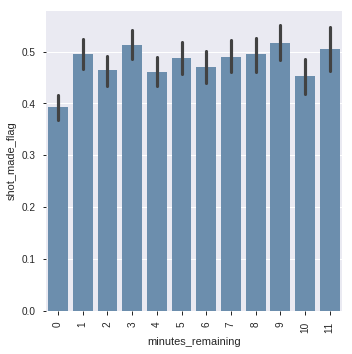

<Figure size 900x600 with 0 Axes>

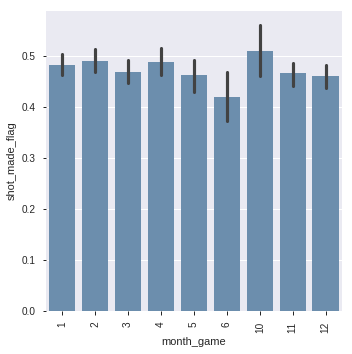

<Figure size 900x600 with 0 Axes>

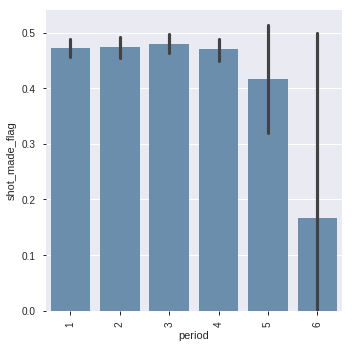

<Figure size 900x600 with 0 Axes>

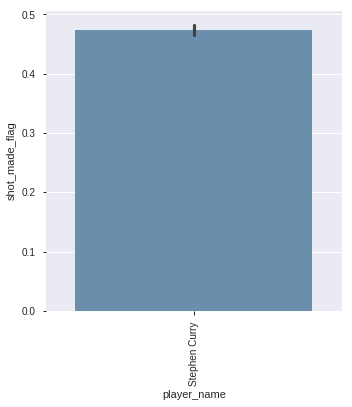

<Figure size 900x600 with 0 Axes>

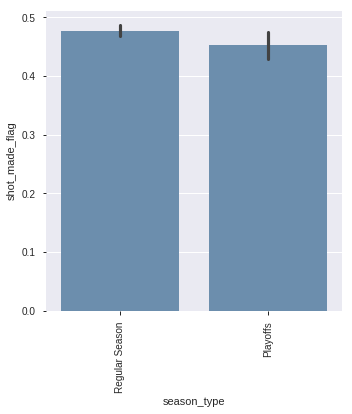

<Figure size 900x600 with 0 Axes>

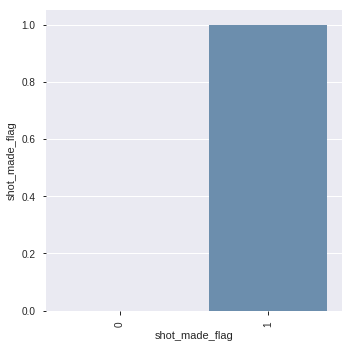

<Figure size 900x600 with 0 Axes>

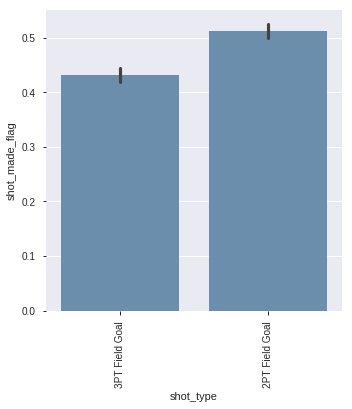

<Figure size 900x600 with 0 Axes>

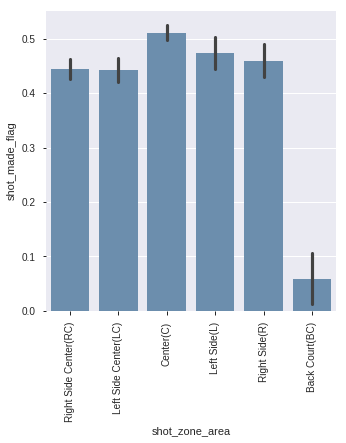

<Figure size 900x600 with 0 Axes>

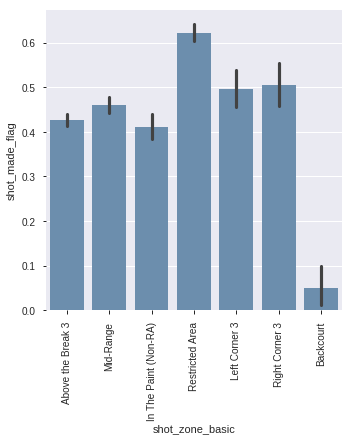

<Figure size 900x600 with 0 Axes>

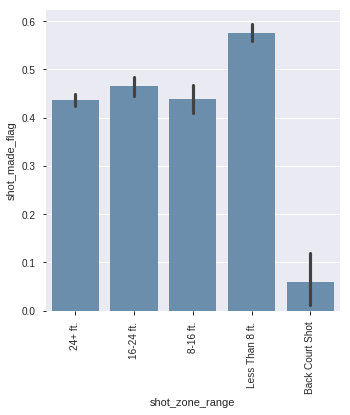

<Figure size 900x600 with 0 Axes>

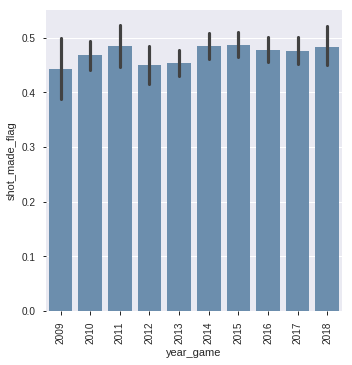

<Figure size 900x600 with 0 Axes>

In [190]:
for col in sorted(train.columns):
  if train[col].nunique() < 25:
    
    sns.catplot(x = col, y = 'shot_made_flag', data = train, kind = 'bar', color = '#618eb8')
    plt.xticks(rotation='vertical')
    plt.figure(dpi=150);
    plt.show();

## 5. Use a scikit-learn pipeline to encode categoricals and fit a Decision Tree or Random Forest model.

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from random import randint

In [0]:
# The status_group column is the target
target = 'shot_made_flag'
y_test = test[target]

In [123]:
y_test.shape

(1709,)

In [126]:

pipeline_decision = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    DecisionTreeClassifier(random_state=42,max_depth=25,min_samples_leaf=6) # 
)


pipeline_decision.fit(X_train, y_train)
print('Train Accuracy', pipeline_decision.score(X_train, y_train))
print('Validation Accuracy', pipeline_decision.score(X_val, y_val))


Train Accuracy 0.8390652107357893
Validation Accuracy 0.5795918367346938


In [142]:
pipeline_random = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=350, min_samples_leaf=3, n_jobs=-1, random_state=42, 
                          max_features=12,oob_score=True) 
)
pipeline_random.fit(X_train, y_train)
print('Train Accuracy', pipeline_random.score(X_train, y_train))
print('Validation Accuracy', pipeline_random.score(X_val, y_val))


Train Accuracy 0.9843861618532503
Validation Accuracy 0.6493877551020408


#Optimize Hyper Parameters

In [184]:
pipeline = make_pipeline(    
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': [50,100,350], 
    'randomforestclassifier__max_depth': [5, 10, None],
    'randomforestclassifier__max_features':[5,10,12],
    'randomforestclassifier__min_samples_leaf':[1,3]
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=20, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


In [177]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean', 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_depth': 5}
Cross-validation MAE 0.6576181242983978


In [175]:
pd.DataFrame(search.cv_results_).sort_values(by = 'rank_test_score').T

,2,10,11,5,4,3,9,0,1,16,17,8,6,7,14,15,12,13
mean_fit_time,0.165564,1.29469,1.2844,0.773492,0.761925,0.187551,0.242704,0.138626,0.150166,1.97747,1.99,0.218852,0.162511,0.178719,0.28572,0.315065,0.195898,0.216817
std_fit_time,0.00334704,0.00703276,0.0138325,0.00324268,0.010435,0.00329274,0.0053254,0.00193232,0.00177026,0.000658817,0.0232241,0.0104281,0.00871355,0.00601116,0.00529714,0.013077,0.00772453,0.00733727
mean_score_time,0.0281547,0.0956985,0.0858621,0.0679207,0.0672286,0.029949,0.0306773,0.0275874,0.0269661,0.121876,0.120899,0.0311999,0.0279746,0.0330898,0.0335676,0.034558,0.028899,0.0300331
std_score_time,0.000690814,0.0140403,0.00164427,0.00207802,0.00222915,0.00108862,0.000445157,0.00125476,0.000322783,0.000856713,0.00120942,0.00100167,0.000828825,0.00777977,0.000285541,0.000482518,0.000946471,0.000591445
param_simpleimputer__strategy,mean,mean,median,median,mean,median,median,mean,median,mean,median,mean,mean,median,mean,median,mean,median
param_randomforestclassifier__n_estimators,10,100,100,100,100,10,10,5,5,100,100,10,5,5,10,10,5,5
param_randomforestclassifier__max_depth,5,10,10,5,5,5,10,5,5,None,None,10,10,10,None,None,None,None
params,"{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf...","{'simpleimputer__strategy': 'mean', 'randomfor...","{'simpleimputer__strategy': 'median', 'randomf..."
split0_test_score,0.656872,0.659627,0.658402,0.663606,0.66483,0.652893,0.651974,0.666054,0.65228,0.641261,0.647995,0.637894,0.625038,0.618916,0.625957,0.621059,0.593511,0.593511
split1_test_score,0.654423,0.651974,0.655341,0.649526,0.646465,0.646771,0.647077,0.641873,0.645852,0.647077,0.636364,0.645852,0.629324,0.623508,0.609122,0.612489,0.607897,0.594429


In [182]:
pipeline_random = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=350, min_samples_leaf=3, n_jobs=-1, random_state=42, 
                          max_features=12,oob_score=True) 
)
pipeline_random.fit(X_train, y_train)
print('Train Accuracy', pipeline_random.score(X_train, y_train))
print('Validation Accuracy', pipeline_random.score(X_val, y_val))

Train Accuracy 0.6725176038371262
Validation Accuracy 0.6477551020408163


## 6.Get your model's validation accuracy

> (Multiple times if you try multiple iterations.)

In [159]:
print('Train Accuracy using Random Forest', pipeline_random.score(X_train, y_train))
print('Validation Accuracy using Random Forest', pipeline_random.score(X_val, y_val))

Train Accuracy using Random Forest 0.9843861618532503
Validation Accuracy using Random Forest 0.6493877551020408


## 7. Get your model's test accuracy

> (One time, at the end.)

In [146]:
X_test=test.drop('shot_made_flag', axis =1)
print(X_test.shape,y_test.shape)
X_test.head()

(1709, 23) (1709,)


,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,htm,vtm,season_type,scoremargin_before_shot,total_remaining_period,total_remaining_game,year_game,month_game,day_game
12249,21800002,10,Stephen Curry,1,11,31,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,226,90,GSW,OKC,Regular Season,0.0,691,-685,2018,10,16
12250,21800002,58,Stephen Curry,1,7,57,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-2,63,GSW,OKC,Regular Season,4.0,477,-659,2018,10,16
12251,21800002,131,Stephen Curry,1,3,46,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,5,29,GSW,OKC,Regular Season,4.0,226,-670,2018,10,16
12252,21800002,141,Stephen Curry,1,2,58,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-6,18,GSW,OKC,Regular Season,7.0,178,-658,2018,10,16
12253,21800002,145,Stephen Curry,1,2,49,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,8,GSW,OKC,Regular Season,7.0,169,-667,2018,10,16


In [147]:
y_pred = pipeline_random.predict(X_test)
print('Validation Accuracy', accuracy_score(y_pred, y_test))

Validation Accuracy 0.609713282621416


## 8. Given a confusion matrix, calculate accuracy, precision, and recall.

Imagine this is the confusion matrix for a binary classification model. Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

### Calculate accuracy 

In [0]:
correct_pred=85+36 #correct predictions

In [0]:
total_pred=85+58+8+36 #total of predictions 

In [153]:
accuracy_confusion_matrix=correct_pred/total_pred
accuracy_confusion_matrix

0.6470588235294118

### Calculate precision

In [0]:
correct_for_class=36
total_class=58+36

In [156]:
precision_positive= correct_for_class/total_class
precision_positive

0.3829787234042553

### Calculate recall

In [0]:
actual_for_class=8+36

In [158]:
Recall_positive= correct_for_class/actual_for_class
Recall_positive

0.8181818181818182

# Feature Importances

In [160]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline_random.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (9799, 23)
X_train shape after encoding (9799, 23)


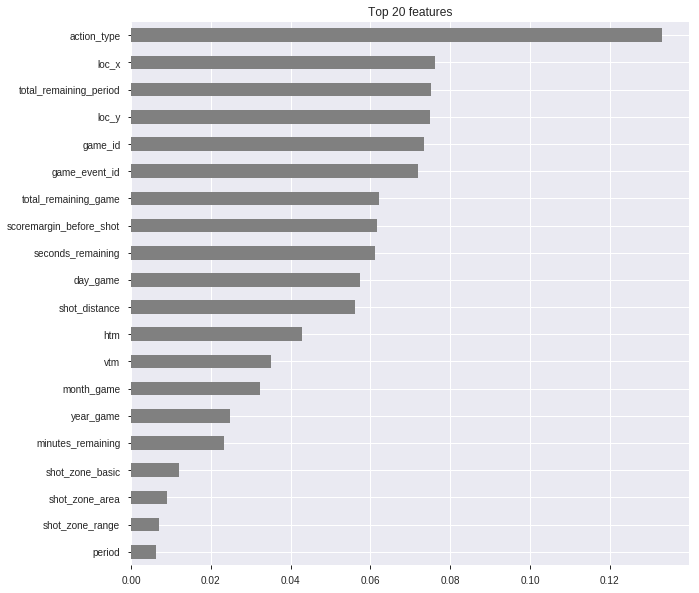

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline_random.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');